### DBSCAN (Density Based Spatial Clusturing of Application with Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_moons(n_samples = 500, noise = 0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

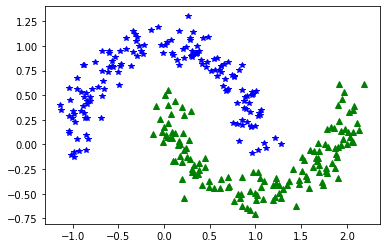

In [3]:
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'b*')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'g^')

In [4]:
dbscan = DBSCAN(eps = 0.18, min_samples = 7)
dbscan.fit(X_train)

DBSCAN(algorithm='auto', eps=0.18, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [5]:
labels = dbscan.labels_

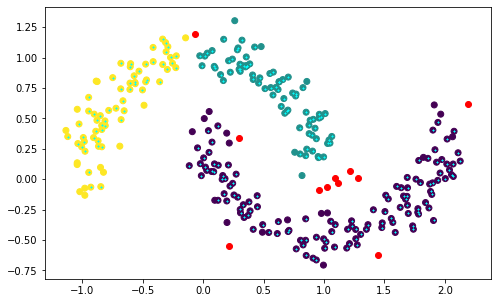

In [6]:
plt.figure(figsize = (8, 5))
core_and_boundary = labels != -1
noise = labels == -1
plt.scatter(X_train[:, 0][core_and_boundary], X_train[:, 1][core_and_boundary], c = labels[core_and_boundary])
plt.scatter(X_train[:, 0][noise], X_train[:, 1][noise], color = 'red', marker = 'o')
plt.scatter(dbscan.components_[:, 0], dbscan.components_[:, 1], marker = 'x', color = 'cyan', s = 1)

In [7]:
X[dbscan.core_sample_indices_]

array([[-1.1222297 ,  0.35051395],
       [-0.88039845,  0.48421949],
       [-1.13719216,  0.40099975],
       [ 0.12181251,  0.23561724],
       [ 2.07741619,  0.39395746],
       [ 0.55181663,  0.86865688],
       [ 0.02887436,  0.07284091],
       [ 1.03002683,  0.29381537],
       [-0.57223996,  0.84999428],
       [ 0.04925944,  0.55629856],
       [ 0.58027666,  0.88037811],
       [ 0.60260305,  0.75511611],
       [ 1.44654714, -0.4341477 ],
       [ 1.04355413,  0.00244266],
       [-0.48627398,  0.75078514],
       [ 1.44822232, -0.62227986],
       [ 0.56622523, -0.44872296],
       [ 1.2622948 , -0.41279486],
       [ 0.09097381,  0.92734482],
       [ 0.69214808,  0.55745846],
       [-0.90300318,  0.53490148],
       [ 0.5089244 , -0.38491347],
       [ 0.89244343, -0.68329055],
       [ 1.5069496 , -0.29591901],
       [ 0.12435065,  0.11471872],
       [ 1.02815548, -0.0527376 ],
       [-0.10218587,  0.48545131],
       [ 0.89334151,  0.43756939],
       [ 0.09546344,

In [8]:
dbscan.components_

array([[ 1.18837673e+00, -5.65933890e-01],
       [ 1.73434660e+00, -3.83420299e-01],
       [ 7.70222068e-01, -5.72591655e-01],
       [ 9.09738141e-02,  9.27344823e-01],
       [ 1.66704547e-01,  8.10845332e-01],
       [ 1.69198464e+00, -7.01098541e-02],
       [-5.03152938e-01,  7.33886195e-01],
       [ 1.96139722e+00,  5.08780584e-02],
       [-5.72239959e-01,  8.49994281e-01],
       [ 1.26357031e+00, -4.89080618e-01],
       [ 4.68706161e-01,  8.32946647e-01],
       [ 3.71747361e-01, -2.97343225e-01],
       [-3.11763698e-01,  1.12306508e+00],
       [ 5.59355702e-01,  7.53147526e-01],
       [-6.01396118e-01,  9.49743280e-01],
       [ 1.61484496e-01,  3.03044799e-02],
       [-1.03838362e+00,  2.93252305e-01],
       [ 5.77695639e-01,  6.92089844e-01],
       [-8.48242455e-01, -6.09666206e-02],
       [ 9.25951244e-01,  4.19029620e-01],
       [ 1.01000355e+00,  5.39642440e-01],
       [-2.86021248e-02,  1.01449599e+00],
       [ 1.56589095e-01, -9.99910255e-04],
       [ 7.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [11]:
knn.score(X_test, y_test)

0.02

In [12]:
knn.score(X_test, 1-y_test)

0.76

In [13]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [14]:
pred = knn.predict(X_new)
pred

array([2, 1, 0, 0], dtype=int64)

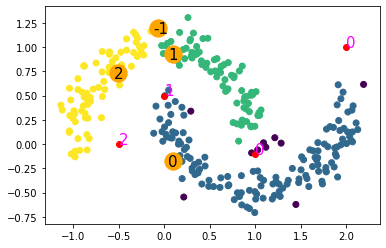

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = labels)
for i in np.unique(dbscan.labels_):
    indx = dbscan.labels_ == i
    plt.scatter(X_train[indx, 0][0], X_train[indx, 1][0], marker = 'o', color = 'orange', s = 300)
    plt.text(X_train[indx, 0][0]-0.05, X_train[indx, 1][0]-0.05, i, fontsize = 15, color = 'black')
plt.scatter(X_new[:, 0], X_new[:, 1], color = 'red')
for i, j, t in zip(X_new[:, 0], X_new[:, 1], pred):
    plt.text(i, j, t, color = 'magenta', fontsize = 15)

[-1.137192157171022,
 2.1928647808732653,
 -0.7058172686265136,
 1.3027387560000303]

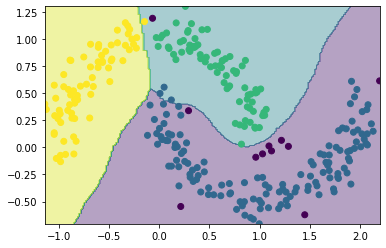

In [26]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 200),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 200)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

pred = knn.predict(X_new).reshape(x0.shape)

plt.contourf(x0, x1, pred, alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c = labels)
plt.axis([X_train[:, 0].min(), X_train[:, 0].max(), X_train[:, 1].min(), X_train[:, 1].max()])